### Exploring Customer Segmentation


<center>
    <img src = images/segments.jpeg>
</center>


In this activity, you are tasked with profiling customer groups for a large telecommunications company.  The data provided contains information on customers purchasing and useage behavior with the telecom products.  Your goal is to use PCA and clustering to segment these customers into meaningful groups, and report back your findings.  

Because these results need to be interpretable, it is important to keep the number of clusters reasonable.  Think about how you might represent some of the non-numeric features so that they can be included in your segmentation models.  You are to report back your approach and findings to the class.  Be specific about what features were used and how you interpret the resulting clusters.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.linalg import svd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv('data/telco_churn_data.csv')

In [5]:
df.head()
print(df['Streaming TV'])

0        No
1        No
2       Yes
3       Yes
4        No
       ... 
7038     No
7039    Yes
7040    Yes
7041     No
7042    Yes
Name: Streaming TV, Length: 7043, dtype: object


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Referred a Friend                  7043 non-null   object 
 2   Number of Referrals                7043 non-null   int64  
 3   Tenure in Months                   7043 non-null   int64  
 4   Offer                              3166 non-null   object 
 5   Phone Service                      7043 non-null   object 
 6   Avg Monthly Long Distance Charges  7043 non-null   float64
 7   Multiple Lines                     7043 non-null   object 
 8   Internet Service                   7043 non-null   object 
 9   Internet Type                      5517 non-null   object 
 10  Avg Monthly GB Download            7043 non-null   int64  
 11  Online Security                    7043 non-null   objec

In [7]:
df.describe()

,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Regular Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Age,Number of Dependents,Zip Code,Latitude,Longitude,Population,Churn Value,CLTV,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,1834.000000
mean,1.951867,32.386767,22.958954,21.110890,65.538800,2280.381264,1.962182,278.499225,749.099262,46.509726,0.468692,93486.070567,36.197455,-119.756684,22139.603294,0.265370,4400.295755,1.338776,0.308107,3.005453
std,3.001199,24.542061,15.448113,20.948471,30.606805,2266.220462,7.902614,685.039625,846.660055,16.750352,0.962802,1856.767505,2.468929,2.154425,21152.392837,0.441561,1183.057152,1.430471,0.717514,1.256938
min,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,19.000000,0.000000,90001.000000,32.555828,-124.301372,11.000000,0.000000,2003.000000,0.000000,0.000000,1.000000
25%,0.000000,9.000000,9.210000,3.000000,35.890000,400.150000,0.000000,0.000000,70.545000,32.000000,0.000000,92101.000000,33.990646,-121.788090,2344.000000,0.000000,3469.000000,0.000000,0.000000,2.000000
50%,0.000000,29.000000,22.890000,17.000000,71.968000,1394.550000,0.000000,0.000000,401.440000,46.000000,0.000000,93518.000000,36.205465,-119.595293,17554.000000,0.000000,4527.000000,1.000000,0.000000,3.000000
75%,3.000000,55.000000,36.395000,28.000000,90.650000,3786.600000,0.000000,182.620000,1191.100000,60.000000,0.000000,95329.000000,38.161321,-117.969795,36125.000000,1.000000,5380.500000,2.000000,0.000000,4.000000
max,11.000000,72.000000,49.990000,94.000000,123.084000,8684.800000,49.790000,6477.000000,3564.720000,80.000000,9.000000,96150.000000,41.962127,-114.192901,105285.000000,1.000000,6500.000000,9.000000,6.000000,5.000000


In [8]:
#lots of Nan in certain columns. so let's drop it
df.isna().sum()

Customer ID                             0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download                 0
Online Security                         0
Online Backup                           0
Device Protection Plan                  0
Premium Tech Support                    0
Streaming TV                            0
Streaming Movies                        0
Streaming Music                         0
Unlimited Data                          0
Contract                                0
Paperless Billing                       0
Payment Method                          0
Monthly Charge                          0
Total Regular Charges             

In [9]:
newdf = df.drop(columns={'Customer ID','Offer','Internet Type','Churn Category','Customer Satisfaction','Churn Reason'})
newdf.isna().sum()

Referred a Friend                    0
Number of Referrals                  0
Tenure in Months                     0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                             0
Paperless Billing                    0
Payment Method                       0
Monthly Charge                       0
Total Regular Charges                0
Total Refunds                        0
Total Extra Data Charges             0
Total Long Distance Charges          0
Gender                               0
Age                      

In [10]:
object_cols = newdf.select_dtypes('object').columns.tolist()
object_cols

['Referred a Friend',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection Plan',
 'Premium Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Streaming Music',
 'Unlimited Data',
 'Contract',
 'Paperless Billing',
 'Payment Method',
 'Gender',
 'Under 30',
 'Senior Citizen',
 'Married',
 'Dependents',
 'City']

In [11]:
#toEncode = newdf.select_dtypes(include=['object']).columns.tolist()  #if we wanted to encode all object type columns
toEncode = ['Multiple Lines','Internet Service','Gender','Married','Dependents']
encoder = OneHotEncoder(drop='first', sparse_output=False)
one_hot_encoded = encoder.fit_transform(newdf[toEncode])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(toEncode))
one_hot_df

,Multiple Lines_Yes,Internet Service_Yes,Gender_Male,Married_Yes,Dependents_Yes
0,0.0,1.0,1.0,0.0,0.0
1,1.0,1.0,0.0,1.0,1.0
2,1.0,1.0,1.0,0.0,1.0
3,0.0,1.0,0.0,1.0,1.0
4,1.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...
7038,0.0,0.0,0.0,0.0,0.0
7039,1.0,1.0,1.0,1.0,1.0
7040,1.0,1.0,0.0,1.0,1.0
7041,0.0,1.0,0.0,1.0,1.0


In [12]:
df_encoded = pd.concat([newdf, one_hot_df], axis=1)

# Drop the original categorical columns to make the df only numerical
df_cleaned = df_encoded.drop(object_cols, axis=1)

In [13]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Number of Referrals                7043 non-null   int64  
 1   Tenure in Months                   7043 non-null   int64  
 2   Avg Monthly Long Distance Charges  7043 non-null   float64
 3   Avg Monthly GB Download            7043 non-null   int64  
 4   Monthly Charge                     7043 non-null   float64
 5   Total Regular Charges              7043 non-null   float64
 6   Total Refunds                      7043 non-null   float64
 7   Total Extra Data Charges           7043 non-null   float64
 8   Total Long Distance Charges        7043 non-null   float64
 9   Age                                7043 non-null   int64  
 10  Number of Dependents               7043 non-null   int64  
 11  Zip Code                           7043 non-null   int64

In [14]:
df_scaled = (df_cleaned - df_cleaned.mean())/df_cleaned.std()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

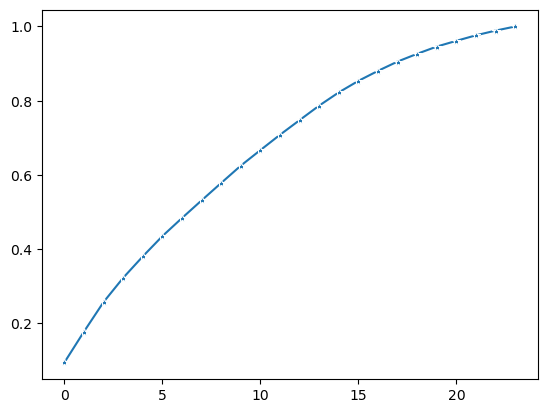

In [15]:
U, s, Vt = svd(df_scaled, full_matrices = False)
Sigma = np.diag(s)

value =  np.cumsum(s)/s.sum()
sns.lineplot(data=value, marker='*')

In [16]:
#method to see how many columns to keep to retain specific % of detail from original table
percent_variance_explained = s/s.sum()
components = int((np.cumsum(percent_variance_explained) < 0.8).sum())  #how many components to get atleast 80% details
components
#this is how many components to keep

14

<class 'numpy.ndarray'>


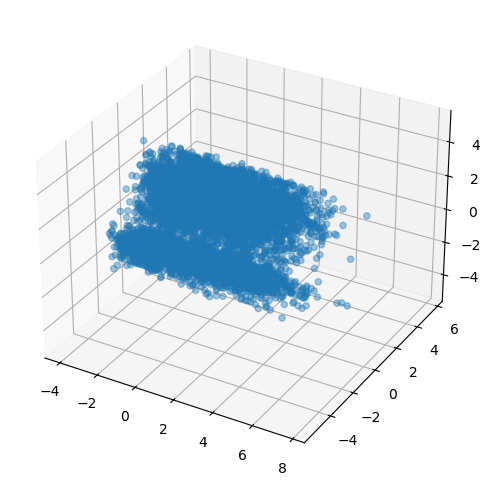

In [17]:
#we should keep atleast 14 components to get at least 80% details but 14 is too many??
#reduce components to 3
pca = PCA(n_components=4)
pca.fit(df_scaled)
transformed_pca_manual = pca.transform(df_scaled)

print(type(transformed_pca_manual))
plt.figure(figsize=(8,6))
ax1 = plt.axes(projection='3d')
ax1.scatter3D(transformed_pca_manual[:,0], transformed_pca_manual[:,1], transformed_pca_manual[:,2], alpha = 0.4)

In [18]:
transformed_pca_manual

array([[-2.91595461, -2.77485599, -1.18848483,  0.02713332],
       [-0.11710424, -2.29707047, -1.37077262,  1.11475288],
       [ 0.071534  , -1.89280167, -1.5073871 ,  2.68390705],
       ...,
       [ 6.13617276, -1.28372579, -0.93649024,  2.50087946],
       [-1.04488242,  1.17237036, -2.53435977,  2.27356452],
       [ 1.56236293, -1.98937756, -0.15124877, -1.5130075 ]])

## Result of PCA is the transformed_pca_manual

### Instead of running manual PCA we can use PCA from Skylearn

In [21]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cleaned)

In [22]:
pca_all = PCA()
pca_all.fit(scaled_data)

PCA()

In [23]:
pca_all.explained_variance_ratio_.round(2)

array([0.17, 0.13, 0.12, 0.08, 0.06, 0.06, 0.04, 0.04, 0.04, 0.04, 0.03,
       0.03, 0.03, 0.03, 0.02, 0.02, 0.01, 0.01, 0.01, 0.01, 0.  , 0.  ,
       0.  , 0.  ])

In [24]:
scree_data_all = pd.DataFrame({'Principle Component':range(1,len(pca_all.explained_variance_ratio_)+1),
                               'Explained Variance Ratio': pca_all.explained_variance_ratio_})
scree_data_all

,Principle Component,Explained Variance Ratio
0,1,0.166918
1,2,0.129565
2,3,0.118692
3,4,0.079669
4,5,0.062091
5,6,0.055802
6,7,0.044465
7,8,0.042217
8,9,0.041253
9,10,0.040614


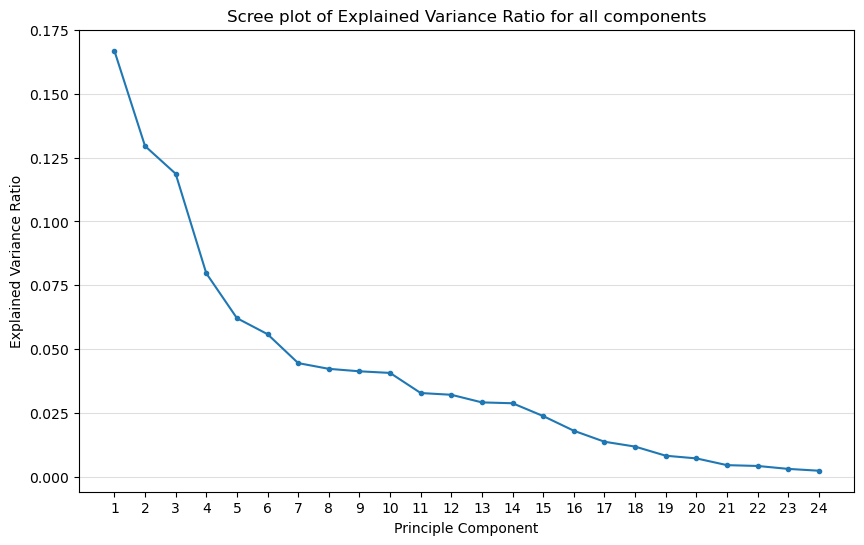

In [25]:
plt.figure(figsize=(10,6))
plt.plot(scree_data_all['Principle Component'],scree_data_all['Explained Variance Ratio'], marker='.')
plt.title('Scree plot of Explained Variance Ratio for all components')
plt.xlabel('Principle Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(scree_data_all['Principle Component'])
plt.grid(axis='y', alpha=0.4)
plt.show()

In [26]:
pca = PCA(n_components=5)
transformed_pca = pca.fit_transform(scaled_data)

## Looking at Kmeans

In [28]:
means = []
inertias = []
def optimize_k_means(data, max_k):
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
        kmeans.fit(data)

        means.append(k)
        inertias.append(kmeans.inertia_)

    fig = plt.subplots(figsize=(10,5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertias')
    plt.grid(True)
    plt.show()

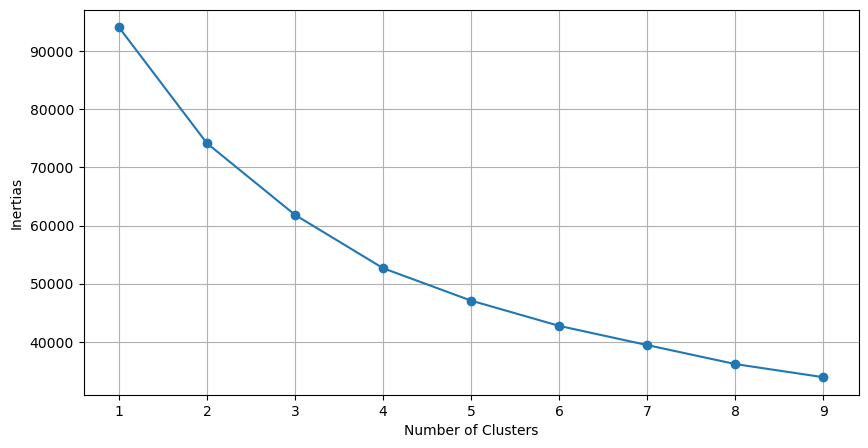

In [29]:
optimize_k_means(transformed_pca, 10)

The Elbow Method is a straightforward technique to visualize how the variance within clusters changes as the number of clusters increases. The idea is to plot the sum of squared distances (inertia) between data points and their assigned centroids for different values of 'K'. As 'K' increases, the inertia tends to decrease since more centroids provide a closer fit to data points. However, there's a point where the rate of decrease slows down, forming an "elbow" in the plot. The 'K' value at the elbow can be considered as the optimal number of clusters, as it balances capturing variance and avoiding over-segmentation.

In [31]:
inertias

[94139.10844691447,
 74165.72600909712,
 61848.710329839785,
 52670.708468276396,
 47088.86809394114,
 42744.254717401236,
 39439.61987472173,
 36170.65293228236,
 33909.444938859866]

In [32]:
kmeans = KMeans(n_clusters=3, n_init = 10, random_state= 42)
cluster_labels = kmeans.fit_predict(df_scaled)
df_cleaned['cluster'] = cluster_labels


### df_cleaned dataframe is now an all numeric dataframe with cluster category applied to each row

In [34]:
cluster_means = df_cleaned.groupby('cluster').mean().round(2)
cluster_means.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, 0 to 2
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Number of Referrals                3 non-null      float64
 1   Tenure in Months                   3 non-null      float64
 2   Avg Monthly Long Distance Charges  3 non-null      float64
 3   Avg Monthly GB Download            3 non-null      float64
 4   Monthly Charge                     3 non-null      float64
 5   Total Regular Charges              3 non-null      float64
 6   Total Refunds                      3 non-null      float64
 7   Total Extra Data Charges           3 non-null      float64
 8   Total Long Distance Charges        3 non-null      float64
 9   Age                                3 non-null      float64
 10  Number of Dependents               3 non-null      float64
 11  Zip Code                           3 non-null      float64
 12  Lat

In [35]:
plot_df = pd.DataFrame({
    'x':transformed_pca[:,0],
    'y':transformed_pca[:,1],
    'Cluster': cluster_labels.astype(str)
})

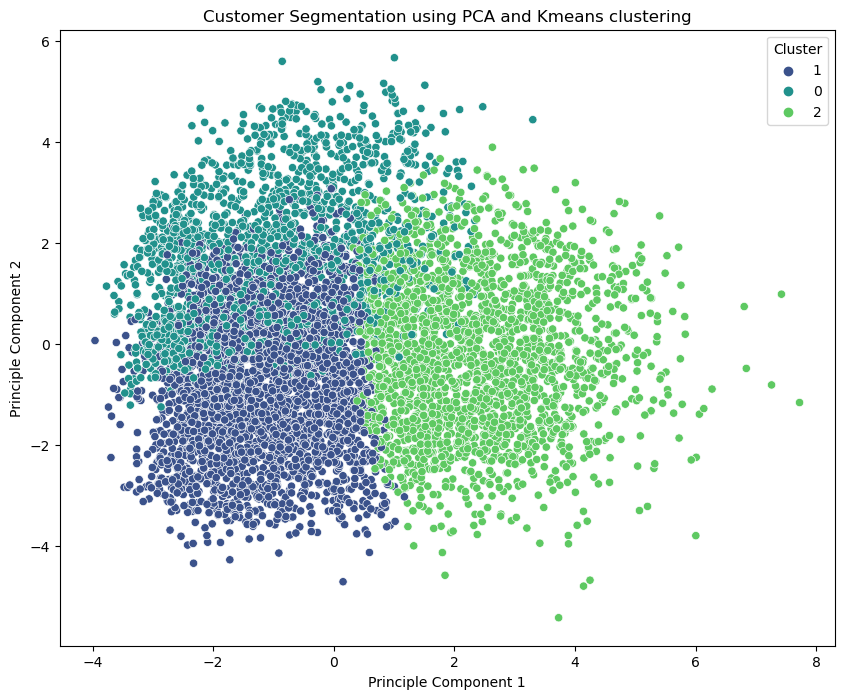

In [36]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=plot_df, x='x', y='y', hue='Cluster', palette='viridis')
plt.title('Customer Segmentation using PCA and Kmeans clustering')
plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')
plt.show()

In [37]:
grouped_df = df_cleaned.groupby('cluster')[['Tenure in Months','Total Regular Charges']]
grouped_df.head()

,Tenure in Months,Total Regular Charges
0,1,39.65
1,8,633.30
2,18,1752.55
3,25,2514.50
4,37,2868.15
25,11,214.75
26,55,4874.70
35,65,6786.40
36,49,4547.25
38,56,5794.65


In [38]:
tenure_regCharges_df = pd.DataFrame({
    'x':df_cleaned['Tenure in Months'],
    'y':df_cleaned['Monthly Charge'],
    'Cluster': cluster_labels.astype(str)
})

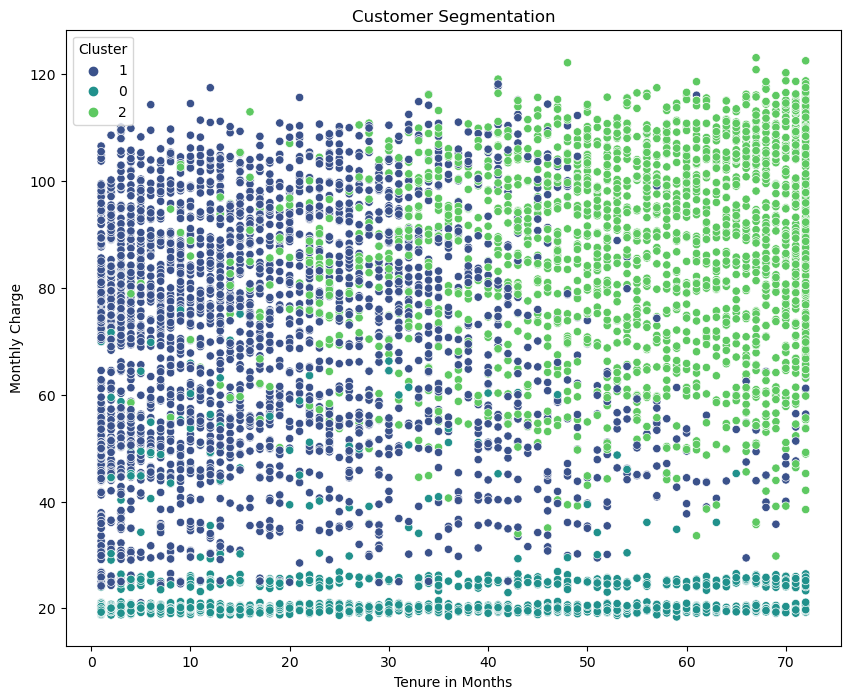

In [39]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=tenure_regCharges_df, x='x', y='y', hue='Cluster', palette='viridis')
plt.title('Customer Segmentation')
plt.xlabel('Tenure in Months')
plt.ylabel('Monthly Charge')
plt.show()

cluster 0 - customers who are willing to pay less to stay with the company.
cluster 1 - customers who are willing to pay a high monthly amount but won't stay with the company too long
cluster 2 - customers who are willing to pay higher and still willing to stay with the company. 